In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/classifying-liver-disease-patients/sample_submission.csv
/kaggle/input/classifying-liver-disease-patients/train.csv
/kaggle/input/classifying-liver-disease-patients/test.csv


In [2]:
train_set_df = pd.read_csv("/kaggle/input/classifying-liver-disease-patients/train.csv")
test_set_df  = pd.read_csv("/kaggle/input/classifying-liver-disease-patients/test.csv")

In [3]:
train_set_df.describe()

,AGE,TB,DB,ALP,ALT,AST,TP,ALB,AGR,STATUS
count,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,406.000000,410.000000
mean,44.756098,2.753659,1.181220,295.231707,85.365854,112.965854,6.471220,3.197073,0.967857,1.287805
std,16.697482,5.468840,2.146291,248.341349,207.123973,331.964765,1.090748,0.794782,0.286926,0.453293
min,4.000000,0.500000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,176.000000,23.250000,24.000000,5.700000,2.625000,0.800000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,40.000000,6.500000,3.200000,1.000000,1.000000
75%,58.000000,2.275000,1.100000,298.000000,60.000000,79.750000,7.200000,3.800000,1.100000,2.000000
max,85.000000,75.000000,14.200000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,1.900000,2.000000


In [4]:

train_set = train_set_df.drop(['PID','GENDER'],axis=1)
y_train = train_set['STATUS']
train_set = train_set.drop(['STATUS'],axis=1)
train_set.head()
# y_test = test_set['STATUS']
test_set = test_set_df.drop(['PID','GENDER'],axis=1)



In [5]:
train_set = pd.get_dummies(train_set,drop_first=True)
train_set.head()

,AGE,TB,DB,ALP,ALT,AST,TP,ALB,AGR
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40


In [6]:
train_set.isnull().sum()

AGE    0
TB     0
DB     0
ALP    0
ALT    0
AST    0
TP     0
ALB    0
AGR    4
dtype: int64

In [7]:
train_set['AGR'] = train_set['AGR'].fillna(train_set['AGR'].mean())
train_set.isnull().sum()

AGE    0
TB     0
DB     0
ALP    0
ALT    0
AST    0
TP     0
ALB    0
AGR    0
dtype: int64

Text(0, 0.5, 'Frequency')

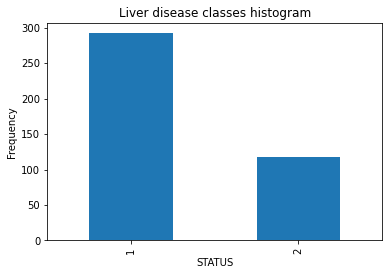

In [8]:
count_classes = pd.value_counts(train_set_df['STATUS'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Liver disease classes histogram")
plt.xlabel("STATUS")
plt.ylabel("Frequency")

In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
cols=list(train_set.columns)
train_set_scaled=pd.DataFrame(data=train_set)
train_set_scaled[cols]=scaler.fit_transform(train_set[cols])
train_set_scaled.head()

,AGE,TB,DB,ALP,ALT,AST,TP,ALB,AGR
0,1.213874,-0.375979,-0.504377,-0.436351,-0.335309,-0.286422,0.301795,0.129661,-0.237952
1,1.033986,1.491412,2.014665,1.627847,-0.103281,-0.039106,0.944340,0.003687,-0.799019
2,1.033986,0.832333,1.361580,0.785235,-0.122617,-0.135619,0.485379,0.129661,-0.273019
3,0.794137,-0.321055,-0.364431,-0.456509,-0.344977,-0.280389,0.301795,0.255636,0.112714
4,1.633611,0.209869,0.381952,-0.404098,-0.282136,-0.162764,0.760756,-1.004108,-1.991286


In [10]:
# sns.pairplot(train_set_scaled,hue='STATUS')

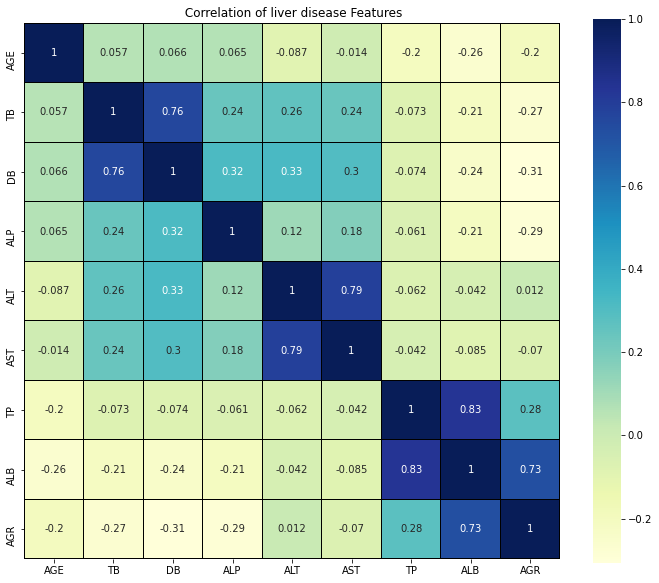

In [11]:
f, ax = plt.subplots(figsize=(12, 10))
plt.title(' Correlation of liver disease Features')
# Draw the heatmap using seaborn
sns.heatmap(train_set_scaled.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black',annot=True)

In [12]:
# from the above corr TB , DB; ALT,AST; TP,ALB,AGR are highly correlated.

In [13]:
train_set.isnull().sum()

AGE    0
TB     0
DB     0
ALP    0
ALT    0
AST    0
TP     0
ALB    0
AGR    0
dtype: int64

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, fbeta_score,accuracy_score
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'n_estimators': [100,250,500], 'max_depth': [3,6,9]}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score,beta=2)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf,parameters,scoring=scorer,n_jobs=-1)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(train_set,y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(train_set,y_train)).predict(test_set)
best_predictions = best_clf.predict(test_set)

In [15]:
pid = test_set_df['PID']
df_out = np.hstack((pid,best_predictions))
output =pd.DataFrame({'PID':pid,'STATUS':best_predictions})
output.head()

,PID,STATUS
0,P2001,1
1,P2002,1
2,P2003,1
3,P2004,1
4,P2005,1


In [16]:
output.to_csv('submission.csv')

In [17]:
df =pd.read_csv('submission.csv')
df.head()

,Unnamed: 0,PID,STATUS
0,0,P2001,1
1,1,P2002,1
2,2,P2003,1
3,3,P2004,1
4,4,P2005,1


In [18]:
df= df.drop('Unnamed: 0',axis=1)

In [19]:
df.head()

,PID,STATUS
0,P2001,1
1,P2002,1
2,P2003,1
3,P2004,1
4,P2005,1


In [20]:
df.to_csv('submission.csv', index=False)

In [21]:
pd.read_csv('submission.csv').head()

,PID,STATUS
0,P2001,1
1,P2002,1
2,P2003,1
3,P2004,1
4,P2005,1
